# Objective: 

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Do the users spend more time on the new landing page than the old landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
* Is the mean time spent on the new page same for the different language users?

# Data Dictionary:

* user_id - This represents the user ID of the person visiting the website.
* group - This represents whether the user belongs to the first group (control) or the second group (treatment).
* landing_page - This represents whether the landing page is new or old.
* time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
* converted - This represents whether the user gets converted to a subscriber of the news portal or not.
* language_preferred - This represents the language chosen by the user to view the landing page.

### Import libraries for analysis

In [1]:
#import libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

### Import the data to jupyter notebook

In [2]:
#import dataset and assign to variable 'data'
data = pd.read_csv('abtest.csv')

In [3]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

### View first few rows of data

In [4]:
df.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


### Check shape of dataset

In [5]:
#View number of rows and columns in data
data.shape

(100, 6)

* Dataset has 180 rows and 9 columns.

### View dataset info including column datatypes

In [6]:
#view summary of data including data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


# Data Preprocessing

### Fixing the datatypes
* Lets convert the categorical variables to categorical datatype. This will include all the data coluimns except the time_spent_on_the_page which is a numerical float
* This is also useful for model building and freeing up space required for data storage


In [7]:
df['user_id']=df['user_id'].astype("category")
df['group']=df['group'].astype("category")
df['landing_page']=df['landing_page'].astype("category")
df['converted']=df['converted'].astype("category")
df['language_preferred']=df['language_preferred'].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(5), float64(1)
memory usage: 7.6 KB


### View statistical summary of Data

In [9]:
data.describe(include=["float64"]) #summary of variable with float datatype

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


In [10]:
df.describe(include=["category"]) #summary of categorical variable

,user_id,group,landing_page,converted,language_preferred
count,100,100,100,100,100
unique,100,2,2,2,3
top,546592,treatment,old,yes,Spanish
freq,1,50,50,54,34


### Check for missing values in dataset

In [11]:
#check for missing values in the columns
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observation**
* There are no missing values in the data

## Exploratory Data Analysis

### Univariate analysis of the Numerical Variables

### Observations on time spent on the page

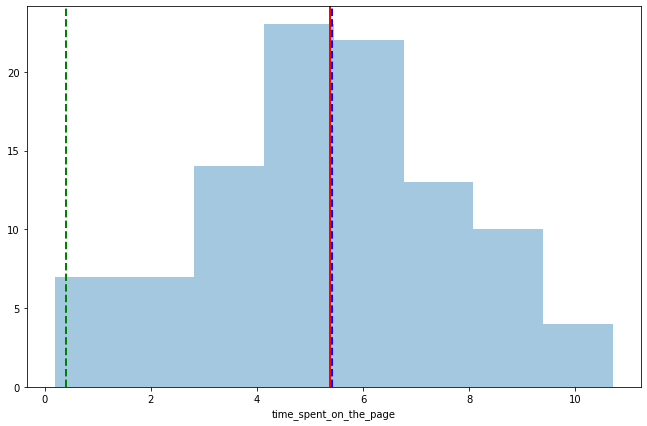

In [12]:
plt.figure(figsize=(11,7))
sns.distplot(df['time_spent_on_the_page'], kde=False)
plt.axvline(df['time_spent_on_the_page'].mean(), color='r', linewidth=2)#Plot mean
plt.axvline(df['time_spent_on_the_page'].median(), color='b', linestyle='dashed', linewidth=2)#Plot median
plt.axvline(df['time_spent_on_the_page'].mode()[0], color='g', linestyle='dashed', linewidth=2)#Plot mode
    

Text(0.5, 0, 'time_spent_on_the_page')

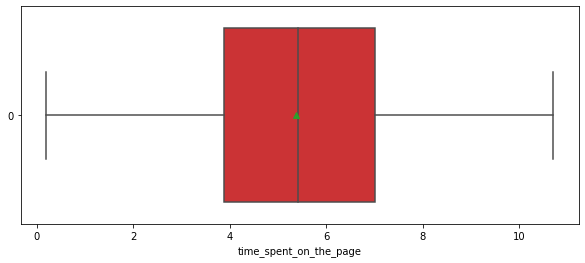

In [13]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df['time_spent_on_the_page'], orient="h",showmeans=True, palette='Set1')
plt.xlabel('time_spent_on_the_page')

**Observations**
* There are no outliers in the data
* The mean and median are almost identical
* The average time spent on page is 5.38
* Seems to have a distribution closer to normal, not heavily skewed to either side

### Univariate analysis of the Categorical Variables

In [14]:
def count_percent(plot, variable): #function to get countplot percentages
    total = len(variable) # length of the variable
    for i in perc.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total) # percentage of each class of the category
        x = i.get_x() + i.get_width() / 2 - 0.05 # width of the plot
        y = i.get_y() + i.get_height()           # height of the plot
        perc.annotate(percentage, (x, y), size = 10) # annotate the percantage

### Observations on Converted

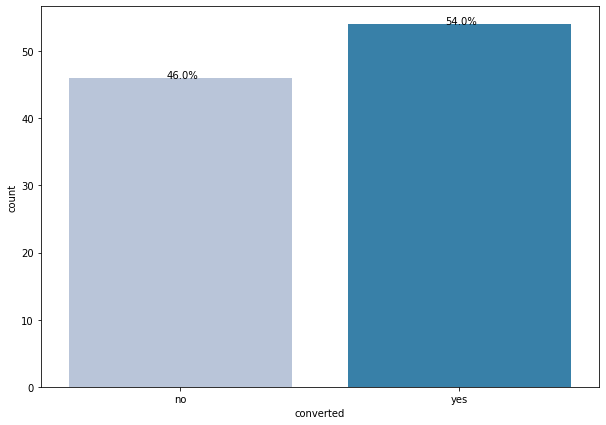

In [15]:
plt.figure(figsize=(10,7))
perc = sns.countplot(df['converted'], palette = 'PuBu')
count_percent(perc,df['converted'])

**Observations**
* A higher percentage of users(54%) are getting converted in total.
* Conversion rate doesn't seem to be high taking into account both groups.

### Observations on language preferred

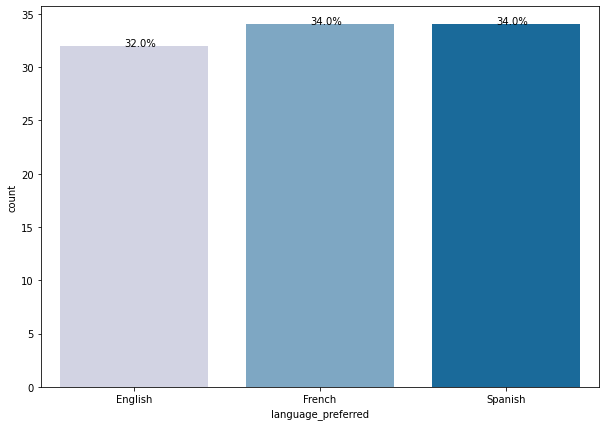

In [16]:
plt.figure(figsize=(10,7))
perc = sns.countplot(df['language_preferred'], palette='PuBu')
count_percent(perc,df['language_preferred'])

**Observations**
* Language preferred seems to be fairly split among users
* French and Spain are both at 34% with English the least preferred at 32%

## Bivariate Analysis

### Converted vs Time spent on the page

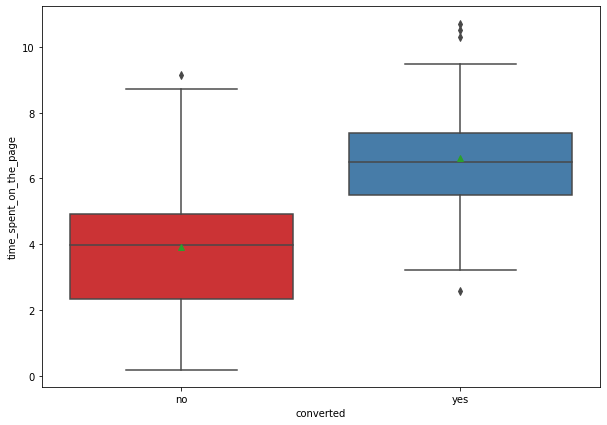

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['converted'], y=df['time_spent_on_the_page'], data=df,showmeans=True, palette='Set1')
plt.show()

**Observations**
* This visualization seems to indicate that converted users tend to spend more time on the page than non-converts.
* Users not converted seems to have a larger spread with some barely spending over a minute.
* Other non-converts spend over 8 minutes which could be as a result of indecisiveness or failure to convince.
* Converted user numbers tend to start higher up at about 3 minutes, having outliers with lesser time.
* Converted users also have a higher average time and outliers at 10 minutes and above which could indicate longer time taken to persuade.

## Multivariate Analysis

## Landing page vs Converted vs Time spent on the page

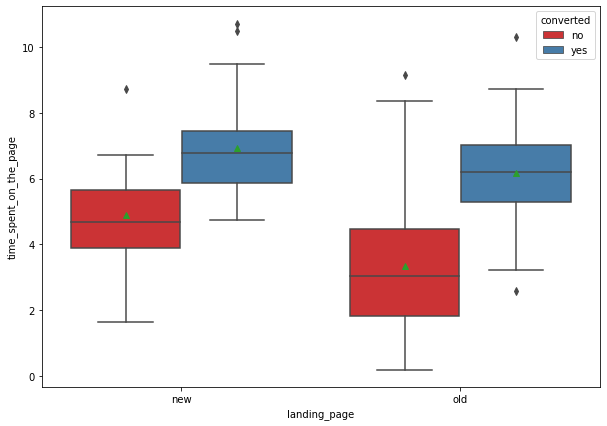

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['landing_page'], y=df['time_spent_on_the_page'], hue = df['converted'], data=df,showmeans=True, palette='Set1')
plt.show()

**Observation**
* The new landing page seems to reduce the spread of users not converted and increase minimum time spent perhaps tackling some of the issues expressed earlier


# Key Question 1:

## Do the users spend more time on the new landing page than the old landing page?

## Visual Analysis

### Time spent on old page vs Time spent on new page

In [19]:
#create a dataframe with two columns to compare time spent on old and new landing page
time_old = pd.Series(df['time_spent_on_the_page'][df['landing_page'] == 'old']).reset_index()
time_old = time_old.rename(columns={'time_spent_on_the_page': 'time_spent_on_the_page_old'})
time_new = pd.Series(df['time_spent_on_the_page'][df['landing_page'] == 'new'])
time_new = list(time_new)
time_spent_split = pd.DataFrame(time_old)
time_spent_split['time_spent_on_the_page_new'] = time_new

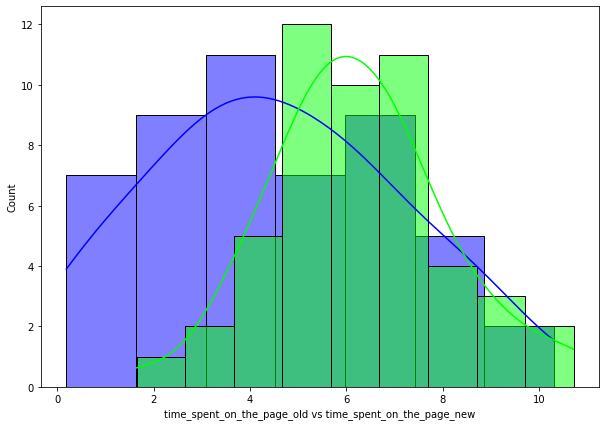

In [20]:
plt.figure(figsize=(10,7))
sns.histplot(time_spent_split['time_spent_on_the_page_old'],color="blue", kde = True)
sns.histplot(time_spent_split['time_spent_on_the_page_new'],color="lime", kde = True)
plt.xlabel('time_spent_on_the_page_old'' ''vs'' ''time_spent_on_the_page_new')
plt.show()

Text(0.5, 0, 'time_spent_on_the_page_old vs time_spent_on_the_page_new')

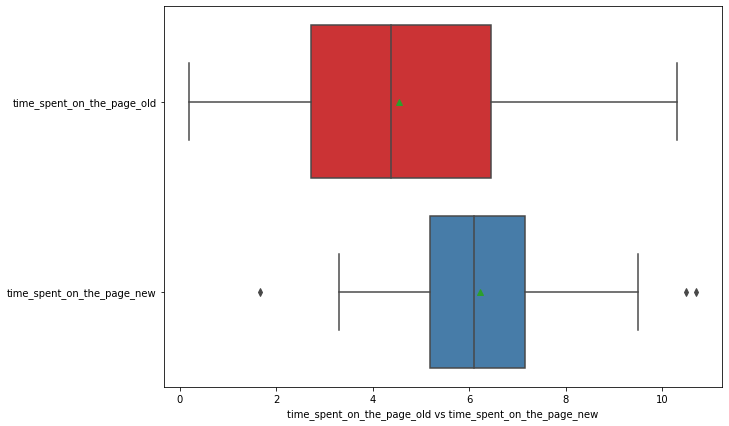

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(data = time_spent_split[['time_spent_on_the_page_old','time_spent_on_the_page_new']],orient="h",showmeans=True, palette='Set1')
plt.xlabel('time_spent_on_the_page_old'' ''vs'' ''time_spent_on_the_page_new')

## Statistical Analysis

## Hypothesis Formulation

**Use the paired sample t-test**

- $H_0: \mu_{new} = \mu_{old}$      (New landing page did not increase the time spent by users on page)

- $H_a: \mu_{new} > \mu_{old}  $      (New landing page increased the time spent by users on page)

### Let's test whether the paired T-test assumptions are satisfied or not

- The level of significance ($\alpha$) = 0.05.

- The sample size , N = 30 which is sufficiently large for a z-test.

- But since the population standard deviation ($\sigma$) is unknown, we have to use a t-test.

- Degree of Freedom: We have N-1 degrees of freedom : 29

- Since the sole purpose of the test is to check whether the new landing page is successful compared to old landing page, we would prefer a right tailed t-test.

### Let's find the p-value and test statistic

In [22]:
t, p_value  = stats.ttest_rel(time_spent_split['time_spent_on_the_page_new'],time_spent_split['time_spent_on_the_page_old'], alternative = 'greater')  #Performing a paired t-test

#print(t, p_value)
print ('The T statistic is:',t,'\n''The pvalue is :',p_value)

The T statistic is: 3.6700490533622028 
The pvalue is : 0.00029910900937037973


## Conclusion from paired T-test

In this scenario, the p value is less than the level of significance which is 0.05. Hence, we reject the null hypothesis. 

This means we have enough statistical evidence to conclude that users spend more time on the new landing page than the old.

# Key Question 2:

## Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

## Visual Analysis

### Landing page vs Converted

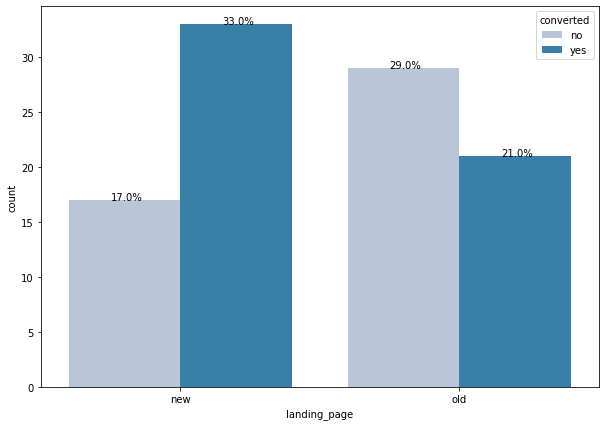

In [23]:
plt.figure(figsize=(10,7))
perc = sns.countplot(df['landing_page'], hue = df['converted'], palette ='PuBu')
count_percent(perc,df['converted'])

## Statistical Analysis

## Hypothesis Formulation

**Use the two proportion z-test**

**$H_0:$ The conversion rate of the new page is equal to the conversion rate of the old page**

**$H_a:$ The conversion rate of the new page is greater than the conversion rate of the old page**

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not..
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{29} =29 \geq 10 $


### Let's extract the proportions

In [24]:
converted_old = df[df['landing_page'] == 'old'][df['converted'] == 'yes']['converted'].count()#number of converted users for old landing page
converted_new = df[df['landing_page'] == 'new'][df['converted'] == 'yes']['converted'].count()#number of converted users for new landing page
print('The number of converted users for new landing page and old landing page are {0} and {1} respectively'.format(converted_new,converted_old))
n_old_landing_page = df[df['landing_page'] == 'old']['converted'].count()#number of users for old landing page
n_new_landing_page = df[df['landing_page'] == 'new']['converted'].count()#number of users for new landing page
print('The number of users for new landing page and old landing page are {0} and {1} respectively'.format(n_new_landing_page,n_old_landing_page))

The number of converted users for new landing page and old landing page are 33 and 21 respectively
The number of users for new landing page and old landing page are 50 and 50 respectively


In [25]:
print(f' The proportion of converted users in new landing page and old landing page = {round(33/50,2)}% and {round(21/50,2)}% respectively')

 The proportion of converted users in new landing page and old landing page = 0.66% and 0.42% respectively


### Let's find the p-value

In [26]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest
# find the p-value
stat, pvalue = proportions_ztest([converted_new, converted_old] , [n_new_landing_page, n_old_landing_page], alternative = 'larger')
print('The p-value is:', pvalue)

The p-value is: 0.008026308204056278


## Conclusion from two proportion z-test

In this scenario, the p value is less than the level of significance which is 0.05. Hence, we reject the null hypothesis. 

This means we have enough statistical evidence to conclude that the conversion rate of the new page is greater than the conversion rate of the old page.

# Key Question 3:

## Does the converted status depend on the preferred language? 

# Visual Analysis

### Language preferred vs Converted

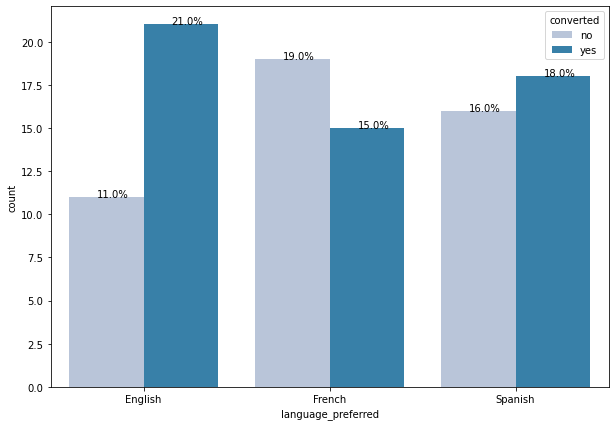

In [27]:
plt.figure(figsize=(10,7))
perc = sns.countplot(df['language_preferred'], hue = df['converted'], palette = 'PuBu')
count_percent(perc,df['converted'])

# Statistical Analysis

## Hypothesis Formulation

**Use the Chi-square test of independence**

**$H_0:$ The converted status is independent of the preferred language**

**$H_a:$ The converted status depends on the preferred language**

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


## Collect and prepare data

In [28]:
#create contigency table using crosstab() function
conti_tab = pd.crosstab(index=data['converted'], columns=data['language_preferred']).reset_index()
#drop the first column
conti_tab = conti_tab.drop(conti_tab.columns[0], axis = 1)
conti_tab

language_preferred,English,French,Spanish
0,11,19,16
1,21,15,18


## Calculate the p-value

In [29]:
from   scipy.stats import chi2_contingency   # For Chi-Square test 
chi2, pval, dof, exp_freq = chi2_contingency(conti_tab) # use chi2_contingency() to find the p-value
print('The p-value is', pval)

The p-value is 0.21298887487543447


## Conclusion from Chi-square test of independence

In this scenario, the p value is greater than the level of significance which is 0.05. Hence, we fail to reject the null hypothesis. 

This means we have enough statistical evidence to conclude that the converted status does not depend on the preferred language.

# Key Question 4:

## Is the mean time spent on the new page same for the different language users?

In [30]:
df_new = df[df['landing_page'] == 'new'] #create dataframe for new landing page
# mean of carbon emission at different levels of the fuel_type factor
print(df_new.groupby('language_preferred')['time_spent_on_the_page'].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


## Visual Analysis

### Language preferred vs time spent on the page

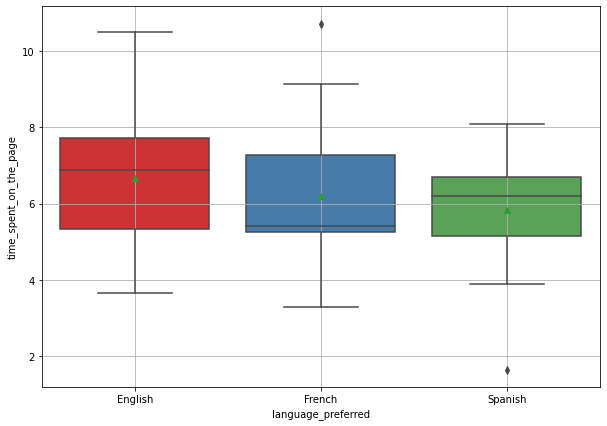

In [31]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df_new['language_preferred'], y=df_new['time_spent_on_the_page'], data=df_new,showmeans=True, palette='Set1')
plt.grid()
plt.show()

## Statistical Analysis

## Hypothesis Formulation

**Use the One-way ANOVA test**

### Let's write the null and alternative hypothesis
$H_0$ : The means of time spent on the new page variable with respect to each language_preferred category are the same.

$H_a$ : At least one of the means of time spent on the new page variable with respect to each language_preferred category are not the same.

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$  Time spent on the new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [32]:
# Assumption 1: Normality
# import the required function
from scipy import stats

w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [33]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



In [34]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_new.loc[df_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


Since the p value in this scenario is greater than 0.05, we can say that we fail to reject the Null Hypothesis ($H_0$). Hence, we have enough statistical significance to conclude that the means of time spent on new page variable with respect to each language preferred category are the same.

## Conclusion

We have been able to conclude that:
* The users spend more time on the new landing page than the old landing page
* The conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page
* The converted status does not depend on the preferred language
* The mean time spent on the new page is the same for the different language users


## Business Recommendation

* The new landing page has been proven to increase user conversion rates and time spent on page. 
* This comprehensive a/b test has been able to prove the new landing page is more effective than the old landing page.